# Lab | Revisiting Machine Learning Case Study

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None)

In [123]:
data = pd.read_csv('learningSet.csv')

C:\Users\dcast\AppData\Local\Temp\ipykernel_16252\3673836359.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('learningSet.csv')


In [124]:
data.dtypes

ODATEDW       int64
OSOURCE      object
TCODE         int64
STATE        object
ZIP          object
             ...   
MDMAUD_R     object
MDMAUD_F     object
MDMAUD_A     object
CLUSTER2    float64
GEOCODE2     object
Length: 481, dtype: object

In [125]:
data.shape

(95412, 481)

Cleaning columns with nans percentage > 25%.

In [126]:
nulls_percent_df = pd.DataFrame(data.isna().sum()/len(data)).reset_index()
nulls_percent_df.columns = ['column_name', 'nulls_percentage']

In [127]:
columns_above_threshold = nulls_percent_df[nulls_percent_df['nulls_percentage']>0.25]

In [128]:
drop_columns_list = list(columns_above_threshold['column_name'])

In [129]:
drop_columns_list.remove('WEALTH1')
drop_columns_list.remove('WEALTH2')

In [130]:
data = data.drop(drop_columns_list, axis=1)

After dealing with mailcode, we replace blank spaces with nans.

In [131]:
data['MAILCODE'] = data['MAILCODE'].apply(lambda x: x.replace(" ", "A"))

In [132]:
data = data.apply(lambda x: x.replace(" ", np.NaN))

We repeat the process.

In [133]:
nulls_percent_df = pd.DataFrame(data.isna().sum()/len(data)).reset_index()
nulls_percent_df.columns = ['column_name', 'nulls_percentage']

In [134]:
columns_above_threshold = nulls_percent_df[nulls_percent_df['nulls_percentage']>0.25]

In [135]:
drop_columns_list = list(columns_above_threshold['column_name'])

We will keep the following: wealth1, wealth2 along with VETERANS, SOLIH.

In [136]:
cols = ['WEALTH1', 'WEALTH2', 'VETERANS', 'SOLIH']

for item in cols:
    drop_columns_list.remove(item)

In [137]:
data = data.drop(drop_columns_list, axis=1)

Target, numerical, categorical.

In [138]:
Y = data[['TARGET_B', 'TARGET_D']]
categorical = data.select_dtypes(object)
numerical = data.select_dtypes(np.number)
numerical = numerical.drop(columns = ['TARGET_B', 'TARGET_D'])

In [139]:
# targets = Y.to_csv('targets_20230911.csv', index=False)

Categorical columns.

In [140]:
categorical.head()

,OSOURCE,STATE,ZIP,MAILCODE,NOEXCH,MDMAUD,DOMAIN,CLUSTER,HOMEOWNR,GENDER,DATASRCE,SOLIH,VETERANS,RFA_2,RFA_3,RFA_4,RFA_6,RFA_7,RFA_8,RFA_9,RFA_11,RFA_12,RFA_14,RFA_16,RFA_18,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,GRI,IL,61081,A,0,XXXX,T2,36,NaN,F,NaN,NaN,NaN,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,L,E,X,X,X,C
1,BOA,CA,91326,A,0,XXXX,S1,14,H,M,3,NaN,NaN,L2G,A2G,A2G,A2G,A1E,A1E,A1E,A1E,A1E,NaN,L1E,NaN,L,G,X,X,X,A
2,AMH,NC,27017,A,0,XXXX,R2,43,U,M,3,NaN,NaN,L4E,S4E,S4E,S4E,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S4D,L,E,X,X,X,C
3,BRY,CA,95953,A,0,XXXX,R2,44,U,F,3,NaN,NaN,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S2D,L,E,X,X,X,C
4,NaN,FL,33176,A,0,XXXX,S2,16,H,F,3,12,NaN,L2F,A2F,A2F,A1D,I2D,A1E,A1E,A1E,A1E,L3D,L3D,A2D,L,F,X,X,X,A


In [141]:
categorical.shape

(95412, 31)

In [142]:
nulls_percent_cat_df = pd.DataFrame(categorical.isna().sum()/len(categorical)).reset_index()
nulls_percent_cat_df.columns = ['column_name', 'nulls_percentage']
nulls_percent_cat_df

,column_name,nulls_percentage
0,OSOURCE,0.009726
1,STATE,0.000000
2,ZIP,0.000000
3,MAILCODE,0.000000
4,NOEXCH,0.000073
5,MDMAUD,0.000000
6,DOMAIN,0.024274
7,CLUSTER,0.024274
8,HOMEOWNR,0.232969
9,GENDER,0.030992


In [143]:
nulls_percent_cat_df[nulls_percent_cat_df['nulls_percentage']>0.5]

,column_name,nulls_percentage
11,SOLIH,0.935019
12,VETERANS,0.890727


We need to keep these two columns (SOLIH and VETERANS).

In [144]:
# single_space_df = []

# for col in categorical.columns:
#     single_space_percent = (categorical[col].str.count(r'^\s$').sum() / len(categorical))
#     single_space_df.append({'column_name': col, 'single_space_percent': single_space_percent})

# single_space_df = pd.DataFrame(single_space_df)

State.

In [145]:
# pd.DataFrame(categorical['STATE'].value_counts()).reset_index()

In [146]:
df = pd.DataFrame(categorical['STATE'].value_counts()).reset_index()

df.columns = ['state', 'count']
other_states = list(df[df['count']<2500]['state'])
#other_states
def clean_state(x):
    if x in other_states:
        return 'other'
    else:
        return x
    
categorical['STATE'] = list(map(clean_state, categorical['STATE']))

In [147]:
categorical['STATE'].value_counts()

other    30457
CA       17343
FL        8376
TX        7535
IL        6420
MI        5654
NC        4160
WA        3577
GA        3403
IN        2980
WI        2795
MO        2712
Name: STATE, dtype: int64

Domain.
- Null values -> mode.
- Domain A -> first character.
- Domain B -> second character.
- Drop original column Domain.

In [148]:
# categorical['DOMAIN'].value_counts(dropna=False)

In [149]:
categorical['DOMAIN'] = categorical['DOMAIN'].fillna('R2')

In [150]:
categorical['DOMAIN_A'] = list(map(lambda x: x[0], categorical['DOMAIN']))
categorical['DOMAIN_B'] = list(map(lambda x: x[1], categorical['DOMAIN']))

In [151]:
categorical.DOMAIN_B.value_counts()

2    48356
1    28498
3    16754
4     1804
Name: DOMAIN_B, dtype: int64

In [152]:
categorical = categorical.drop(columns=['DOMAIN'])

In [153]:
# categorical.head()

NOEXCH and MDMAUD.

In [154]:
# categorical.NOEXCH.value_counts(dropna=False)

In [155]:
# categorical.MDMAUD.value_counts()

In [156]:
drop_list = []

In [157]:
drop_list.append('MDMAUD')
drop_list.append('NOEXCH')

MDMAUD_XXX.

In [158]:
# categorical['MDMAUD_A'].value_counts()

In [159]:
drop_list = drop_list + ['MDMAUD_R', 'MDMAUD_F','MDMAUD_A']

CLUSTER.

In [160]:
categorical['CLUSTER'].sort_values().unique()

array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
       '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39',
       '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
       '5', '50', '51', '52', '53', '6', '7', '8', '9', nan], dtype=object)

In [161]:
categorical['CLUSTER'].value_counts(dropna=False)

40     3979
35     3624
36     3617
27     3553
24     3539
49     3315
12     3000
18     2897
13     2706
30     2607
39     2601
45     2515
43     2385
11     2378
51     2322
NaN    2316
14     2246
41     2176
44     1953
16     1947
2      1942
21     1891
8      1828
10     1804
46     1800
28     1630
17     1621
20     1568
53     1441
3      1428
34     1358
42     1358
23     1324
31     1285
22     1282
25     1275
38     1200
15     1173
1      1140
7      1076
5      1014
37      972
26      947
47      868
29      859
32      795
48      787
50      776
9       770
6       603
33      593
4       561
19      497
52      270
Name: CLUSTER, dtype: int64

In [162]:
categorical['CLUSTER'] = categorical['CLUSTER'].fillna('40') # the mode. 'Other' could also be valid.

HOMEOWNR.

In [163]:
categorical['HOMEOWNR'].value_counts(dropna=False)

H      52354
NaN    22228
U      20830
Name: HOMEOWNR, dtype: int64

In [164]:
categorical['HOMEOWNR'] = categorical['HOMEOWNR'].fillna('U') # We assume NaN means we don't have the information.

GENDER.

In [165]:
categorical['GENDER'].value_counts(dropna=False)

F      51277
M      39094
NaN     2957
U       1715
J        365
C          2
A          2
Name: GENDER, dtype: int64

In [166]:
categorical['GENDER'] = categorical['GENDER'].fillna('F')

In [167]:
# categorical['GENDER'].value_counts(dropna=False)

In [168]:
categorical['GENDER'] = categorical['GENDER'].replace(['U', 'J', 'C', 'A'], 'other')

In [169]:
categorical['GENDER'].value_counts(dropna=False)

F        54234
M        39094
other     2084
Name: GENDER, dtype: int64

DATASRCE.

In [170]:
categorical['DATASRCE'].value_counts(dropna=False)

3      43549
2      23455
NaN    21280
1       7128
Name: DATASRCE, dtype: int64

In [171]:
categorical['DATASRCE'] = categorical['DATASRCE'].fillna('0') # As there are two many nans, we create a new category.

GEOCODE2.

In [172]:
categorical['GEOCODE2'].value_counts(dropna=False)

A      34484
B      28505
D      16580
C      15524
NaN      319
Name: GEOCODE2, dtype: int64

In [173]:
categorical['GEOCODE2'] = categorical['GEOCODE2'].fillna('A') # the mode.

In [174]:
categorical.columns

Index(['OSOURCE', 'STATE', 'ZIP', 'MAILCODE', 'NOEXCH', 'MDMAUD', 'CLUSTER',
       'HOMEOWNR', 'GENDER', 'DATASRCE', 'SOLIH', 'VETERANS', 'RFA_2', 'RFA_3',
       'RFA_4', 'RFA_6', 'RFA_7', 'RFA_8', 'RFA_9', 'RFA_11', 'RFA_12',
       'RFA_14', 'RFA_16', 'RFA_18', 'RFA_2R', 'RFA_2A', 'MDMAUD_R',
       'MDMAUD_F', 'MDMAUD_A', 'GEOCODE2', 'DOMAIN_A', 'DOMAIN_B'],
      dtype='object')

RFA.

In [175]:
categorical['RFA_6'].value_counts()

A1F    15696
F1F     6704
A1G     6634
A1E     5429
A2F     5353
       ...  
A3B        1
U1C        1
P1A        1
A2B        1
I1D        1
Name: RFA_6, Length: 108, dtype: int64

In [176]:
# We will keep the column RFA_2X. We will delete rest of the columns 
for col_name in categorical.columns:
    if "RFA" in col_name:
        drop_list.append(col_name)       

In [177]:
drop_list.remove('RFA_2R')
drop_list.remove('RFA_2A')
# drop_list

In [178]:
categorical = categorical.drop(columns=drop_list)
categorical.head()

,OSOURCE,STATE,ZIP,MAILCODE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,SOLIH,VETERANS,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B
0,GRI,IL,61081,A,36,U,F,0,NaN,NaN,L,E,C,T,2
1,BOA,CA,91326,A,14,H,M,3,NaN,NaN,L,G,A,S,1
2,AMH,NC,27017,A,43,U,M,3,NaN,NaN,L,E,C,R,2
3,BRY,CA,95953,A,44,U,F,3,NaN,NaN,L,E,C,R,2
4,NaN,FL,33176,A,16,H,F,3,12,NaN,L,F,A,S,2


In [179]:
categorical.isna().sum()

OSOURCE       928
STATE           0
ZIP             0
MAILCODE        0
CLUSTER         0
HOMEOWNR        0
GENDER          0
DATASRCE        0
SOLIH       89212
VETERANS    84986
RFA_2R          0
RFA_2A          0
GEOCODE2        0
DOMAIN_A        0
DOMAIN_B        0
dtype: int64

OSOURCE.

In [180]:
# data['OSOURCE'].value_counts(dropna=False).head(60)

In [181]:
categorical['OSOURCE'] = categorical['OSOURCE'].fillna('MBC') # the mode. there aren't that many nan values.

ZIP.

In [182]:
categorical.ZIP.value_counts()

85351     61
92653     59
85710     54
95608     50
60619     45
          ..
70058-     1
93024      1
96306      1
30060-     1
32776-     1
Name: ZIP, Length: 19938, dtype: int64

In [183]:
categorical = categorical.drop(columns=['OSOURCE', 'ZIP'])
categorical.head()

,STATE,MAILCODE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,SOLIH,VETERANS,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B
0,IL,A,36,U,F,0,NaN,NaN,L,E,C,T,2
1,CA,A,14,H,M,3,NaN,NaN,L,G,A,S,1
2,NC,A,43,U,M,3,NaN,NaN,L,E,C,R,2
3,CA,A,44,U,F,3,NaN,NaN,L,E,C,R,2
4,FL,A,16,H,F,3,12,NaN,L,F,A,S,2


In [184]:
# categorical.to_csv('categorical_20230911.csv', index=False)

# Lab | Feature engineering

In [185]:
numerical.head()

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_11,ADATE_12,ADATE_14,ADATE_16,ADATE_18,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,0,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9508.0,9506.0,9503.0,9501.0,27,9702,74,6,14,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,4,39.0
1,9401,1,5202,46.0,6.0,9.0,16,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,9706,9606.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9509.0,NaN,9503.0,NaN,12,9702,32,6,13,47.0,3,1,10.0,9310,25.0,9512,25.0,9512,9310,9504.0,18.0,15.666667,148535,0,2,1.0
2,9001,1,0,NaN,3.0,1.0,2,0,20,29,33,6,8,1,1.0,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,

In [186]:
numerical.shape

(95412, 335)

In [187]:
df = pd.DataFrame(numerical.isna().sum()).reset_index()
df.columns = ['column_name', 'nulls']
df[df['nulls']>0]

,column_name,nulls
3,AGE,23665
4,INCOME,21286
5,WEALTH1,44732
14,WEALTH2,43823
135,MSA,132
136,ADI,132
137,DMA,132
302,ADATE_3,1950
303,ADATE_4,2191
304,ADATE_6,3557


Dropping ADATE_ columns.

In [188]:
columns_to_drop = []

for col in numerical.columns:
    if 'ADATE_' in col:
        columns_to_drop.append(col)

numerical.drop(columns=columns_to_drop, inplace=True)

In [189]:
df = pd.DataFrame(numerical.isna().sum()).reset_index()
df.columns = ['column_name', 'nulls']
df[df['nulls']>0]

,column_name,nulls
3,AGE,23665
4,INCOME,21286
5,WEALTH1,44732
14,WEALTH2,43823
135,MSA,132
136,ADI,132
137,DMA,132
316,NEXTDATE,9973
317,TIMELAG,9973
322,CLUSTER2,132


Age.

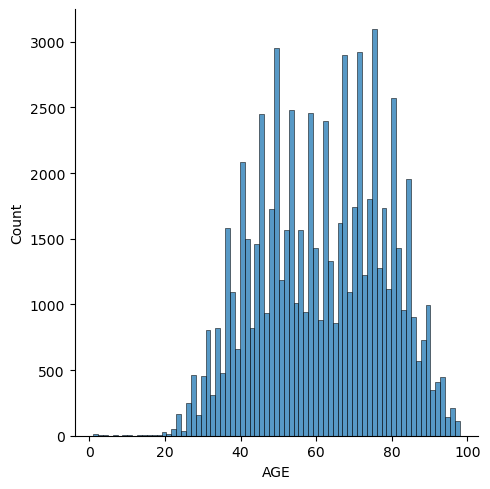

In [190]:
sns.displot(numerical['AGE'])
plt.show()

In [191]:
numerical['AGE'] = numerical["AGE"].fillna(np.mean(numerical['AGE'])) # We use the mean to do it quickly. We could come back later if wee see this is an important feature for the model.

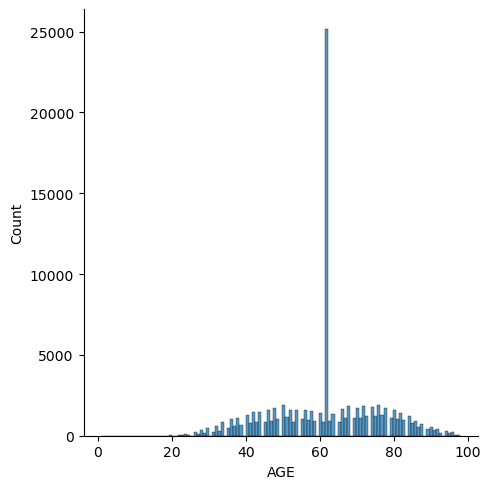

In [192]:
sns.displot(numerical['AGE'])
plt.show()

Income.

In [193]:
# looks like income variable is actually categorical.
print(numerical['INCOME'].value_counts(dropna=False))
numerical['INCOME'] = numerical['INCOME'].astype(object)
numerical['INCOME'] = numerical['INCOME'].fillna(5.0) # Using the mode.

NaN    21286
5.0    15451
2.0    13114
4.0    12732
1.0     9022
3.0     8558
6.0     7778
7.0     7471
Name: INCOME, dtype: int64


Wealth 2.

In [194]:
df = pd.DataFrame(numerical.isna().sum()).reset_index()
df.columns = ['column_name', 'nulls']
df[df['nulls']>0]

,column_name,nulls
5,WEALTH1,44732
14,WEALTH2,43823
135,MSA,132
136,ADI,132
137,DMA,132
316,NEXTDATE,9973
317,TIMELAG,9973
322,CLUSTER2,132


In [195]:
numerical['WEALTH2'].value_counts(dropna=False) # We see it's a category based on wealth.

NaN    43823
9.0     6523
8.0     5975
7.0     5684
6.0     5497
5.0     5351
4.0     5074
3.0     5046
2.0     4971
1.0     4191
0.0     3277
Name: WEALTH2, dtype: int64

In [196]:
numerical['WEALTH2'].median()

5.0

In [197]:
numerical['WEALTH2'] = numerical['WEALTH2'].astype(object) 
numerical['WEALTH2'] = numerical['WEALTH2'].fillna('5.0') #the median

Timelag.

In [198]:
numerical['TIMELAG'].value_counts(dropna=False)

NaN       9973
5.0       8584
4.0       8490
3.0       8485
6.0       6648
          ... 
89.0         1
1044.0       1
53.0         1
442.0        1
1088.0       1
Name: TIMELAG, Length: 69, dtype: int64

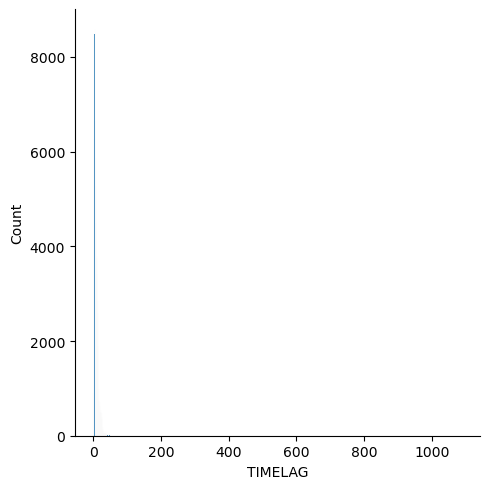

In [199]:
sns.displot(numerical['TIMELAG']) 
plt.show()

In [200]:
numerical['TIMELAG'] = numerical['TIMELAG'].fillna(0.0)

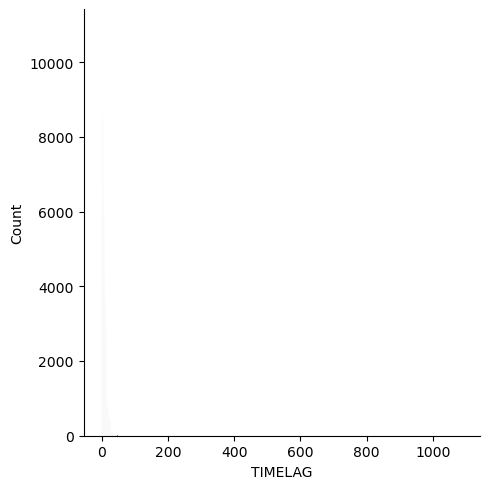

In [201]:
sns.displot(numerical['TIMELAG']) 
plt.show()

Checking remaining null values in numerical.

In [202]:
df = pd.DataFrame(numerical.isna().sum()).reset_index()
df.columns = ['column_name', 'nulls']
df[df['nulls']>0]

,column_name,nulls
5,WEALTH1,44732
135,MSA,132
136,ADI,132
137,DMA,132
316,NEXTDATE,9973
322,CLUSTER2,132


Wealth 1.

In [203]:
numerical['WEALTH1'].value_counts(dropna=False) # We see it's a category based on wealth.

NaN    44732
9.0     7585
8.0     6793
7.0     6198
6.0     5825
5.0     5280
4.0     4810
3.0     4237
2.0     4085
1.0     3454
0.0     2413
Name: WEALTH1, dtype: int64

In [204]:
numerical['WEALTH1'].median()

6.0

In [205]:
numerical['WEALTH1'] = numerical['WEALTH1'].astype(object) 
numerical['WEALTH1'] = numerical['WEALTH1'].fillna('6.0') #the median

ADI, DMA, MSA, cluster 2.

In [206]:
df_filt = numerical[['MSA', 'ADI', 'DMA', 'CLUSTER2']]

In [207]:
df_filt[df_filt.isna().all(axis=1)]

,MSA,ADI,DMA,CLUSTER2
577,NaN,NaN,NaN,NaN
1119,NaN,NaN,NaN,NaN
2250,NaN,NaN,NaN,NaN
3326,NaN,NaN,NaN,NaN
5558,NaN,NaN,NaN,NaN
...,...,...,...,...
90627,NaN,NaN,NaN,NaN
90993,NaN,NaN,NaN,NaN
92870,NaN,NaN,NaN,NaN
93624,NaN,NaN,NaN,NaN


MSA is Metropolitan Statistical Area, ADI is Area Development Index and DMA is Designated Market Area (it is usually used by advertising companies). We already have information about the state and the income and wealth levels of the individuals so these columns don't seem that relevant for the model (one option could be to drop them).

By the moment, we use the mode (they are codes, they represent categories).

In [208]:
numerical['MSA'].value_counts(dropna=False)

0.0       21333
4480.0     4606
1600.0     4059
2160.0     2586
520.0      1685
          ...  
9140.0        1
3200.0        1
9280.0        1
743.0         1
8480.0        1
Name: MSA, Length: 299, dtype: int64

In [209]:
numerical['MSA'].mode()

0    0.0
Name: MSA, dtype: float64

In [210]:
numerical['MSA'] = numerical['MSA'].fillna(0.0)

In [211]:
numerical['MSA'].value_counts(dropna=False)

0.0       21465
4480.0     4606
1600.0     4059
2160.0     2586
520.0      1685
          ...  
9140.0        1
3200.0        1
9280.0        1
743.0         1
8480.0        1
Name: MSA, Length: 298, dtype: int64

In [212]:
numerical['MSA'] = numerical['MSA'].astype(object)

In [213]:
numerical['ADI'].value_counts(dropna=False)

13.0     7296
51.0     4622
65.0     3765
57.0     2836
105.0    2617
         ... 
651.0       1
103.0       1
601.0       1
161.0       1
147.0       1
Name: ADI, Length: 205, dtype: int64

In [214]:
numerical['ADI'].mode()

0    13.0
Name: ADI, dtype: float64

In [215]:
numerical['ADI'] = numerical['ADI'].fillna(13.0)

In [216]:
numerical['ADI'].value_counts(dropna=False)

13.0     7428
51.0     4622
65.0     3765
57.0     2836
105.0    2617
         ... 
651.0       1
103.0       1
601.0       1
161.0       1
147.0       1
Name: ADI, Length: 204, dtype: int64

In [217]:
numerical['ADI'] = numerical['ADI'].astype(object)

In [218]:
numerical['DMA'].value_counts(dropna=False)

803.0    7296
602.0    4632
807.0    3765
505.0    2839
819.0    2588
         ... 
569.0       1
554.0       1
584.0       1
552.0       1
516.0       1
Name: DMA, Length: 207, dtype: int64

In [219]:
numerical['DMA'].mode()

0    803.0
Name: DMA, dtype: float64

In [220]:
numerical['DMA'] = numerical['DMA'].fillna(803.0)

In [221]:
numerical['DMA'].value_counts(dropna=False)

803.0    7428
602.0    4632
807.0    3765
505.0    2839
819.0    2588
         ... 
569.0       1
554.0       1
584.0       1
552.0       1
516.0       1
Name: DMA, Length: 206, dtype: int64

In [222]:
numerical['DMA'] = numerical['DMA'].astype(object)

For cluster2 we will use the mean, as done during the lesson.

In [223]:
# numerical['CLUSTER2'].value_counts(dropna=False)

In [224]:
numerical['CLUSTER2'] = numerical['CLUSTER2'].fillna(np.ceil(np.mean(numerical['CLUSTER2'])))

In [225]:
# numerical['CLUSTER2'].value_counts(dropna=False)

In [226]:
numerical['CLUSTER2'].value_counts(dropna=False)

13.0    3466
5.0     3154
57.0    2666
59.0    2653
15.0    2559
        ... 
30.0     647
46.0     644
29.0     569
40.0     369
6.0      211
Name: CLUSTER2, Length: 62, dtype: int64

In [227]:
df = pd.DataFrame(numerical.isna().sum()).reset_index()
df.columns = ['column_name', 'nulls']
df[df['nulls']>0]

,column_name,nulls
316,NEXTDATE,9973


In [228]:
len(numerical['NEXTDATE'])

95412

In [229]:
9973/95412

0.10452563618832013

In [230]:
numerical['NEXTDATE'].value_counts(dropna=False)

NaN       9973
9504.0    2253
9412.0    1970
8703.0    1959
9512.0    1870
          ... 
8107.0       1
7408.0       1
8207.0       1
8104.0       1
8412.0       1
Name: NEXTDATE, Length: 189, dtype: int64

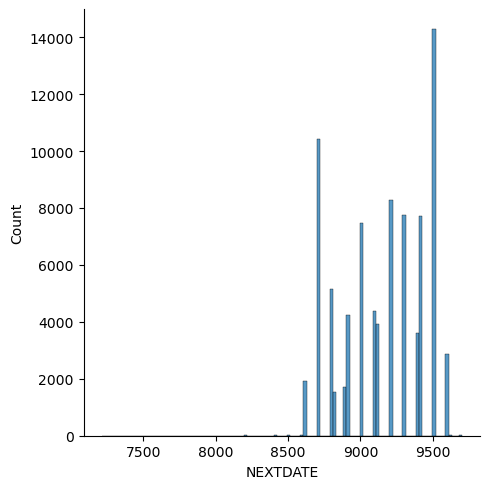

In [231]:
sns.displot(numerical['NEXTDATE']) 
plt.show()

In [232]:
data[data['TIMELAG'].isna()==True]['NEXTDATE'].value_counts(dropna=False)

NaN    9973
Name: NEXTDATE, dtype: int64

We already have most of the information with firstdate and timelag, so we decide to drop this column NEXTDATE.

In [233]:
numerical = numerical.drop('NEXTDATE', axis=1)

In [234]:
numerical.dtypes

ODATEDW       int64
TCODE         int64
DOB           int64
AGE         float64
INCOME      float64
             ...   
AVGGIFT     float64
CONTROLN      int64
HPHONE_D      int64
RFA_2F        int64
CLUSTER2    float64
Length: 322, dtype: object

In [235]:
# numerical.to_csv('numerical_20230911.csv', index=False)